In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [29]:
# Load data for vehicle flows
veh_num_array = list(range(20, 120, 10))
veh_data = {veh_num: np.load(f"../pareto/single_ring/different_veh/veh_{veh_num}/flow_eps.npy") for veh_num in veh_num_array}

# Check shape of one dataset
veh_20 = veh_data[20]
print(veh_20.shape)

(40, 3001)


In [30]:
# Define color fading function
def colorFader(c1, c2, mix=0):
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1 - mix) * c1 + mix * c2)

veh_colors = {
    20: ('#FFF9C4', '#A18800'),   # very light yellow to much darker yellow
    30: ('#C8E6C9', '#0A3D00'),   # very light green to much darker green
    40: ('#E3F2FD', '#002171'),   # very light blue to much darker blue
    50: ('#FFCCBC', '#8E0000'),   # very light orange to much darker orange
    60: ('#F8BBD0', '#560027'),   # very light pink to much darker pink
    70: ('#E1BEE7', '#2C003E'),   # very light purple to much darker purple
    80: ('#FFECB3', '#C56000'),   # very light amber to much darker amber
    90: ('#EFEBE9', '#1B0000'),   # very light brown to much darker brown
    100: ('#E0F7FA', '#00363A'),  # very light cyan to much darker cyan
    110: ('#ECEFF1', '#000A12'),  # very light blue-grey to much darker blue-grey
    120: ('#F1F8E9', '#1B5E20')   # very light green to much darker green
}

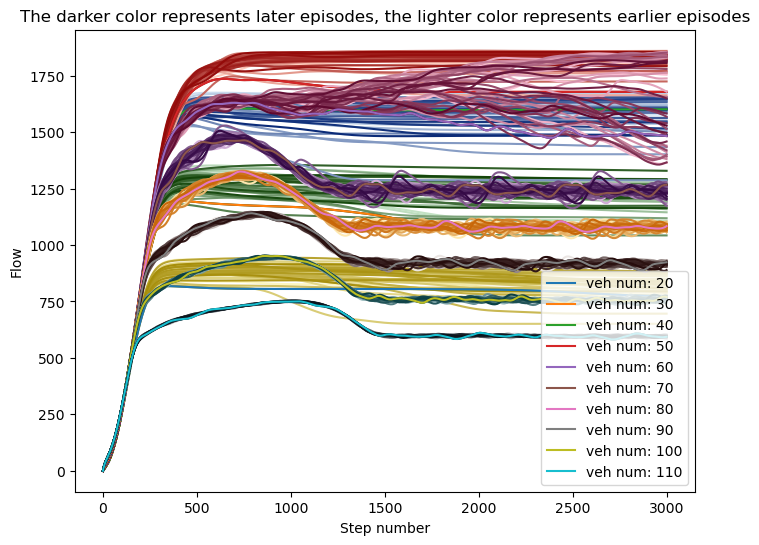

In [31]:
# Function to plot vehicle data
def plot_vehicle_data(veh_num_array, veh_data, veh_colors):
    fig, ax = plt.subplots(figsize=(8, 6))
    for veh_num in veh_num_array:
        data = veh_data[veh_num]
        n = data.shape[0]  # number of evaluation times
        x = range(data.shape[1])
        c1, c2 = veh_colors[veh_num]
        # Plotting each episode for the current vehicle number
        for i in range(n):
            plt.plot(x, data[i, :], color=colorFader(c1, c2, i / n))
        plt.plot(x, data[-1, :], label=f"veh num: {veh_num}")

    plt.ylabel("Flow", fontsize=10)
    plt.xlabel("Step number", fontsize=10)
    plt.title("The darker color represents later episodes, the lighter color represents earlier episodes")
    plt.legend()
    plt.show()

# Call the function to plot data
plot_vehicle_data(veh_num_array, veh_data, veh_colors)



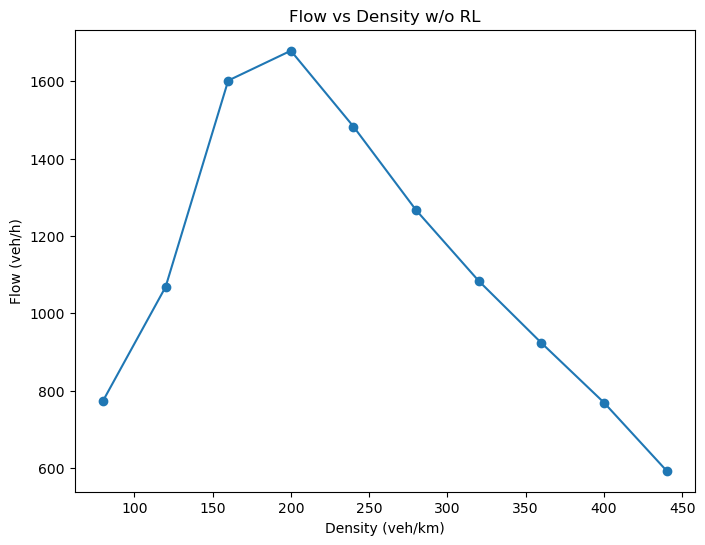

In [33]:
# Plotting Flow vs Density
fig, ax = plt.subplots(figsize=(8, 6))
density = np.array(veh_num_array) / (250 * 1e-3)
flow = np.array([veh_data[veh_num][-1, -1] for veh_num in veh_num_array])

plt.plot(density, flow, marker='o', label="Flow vs Density")
plt.ylabel("Flow (veh/h)", fontsize=10)
plt.xlabel("Density (veh/km)", fontsize=10)
plt.title("Flow vs Density w/o RL")
# plt.legend(loc="upper right")
plt.show()
